# Initialization

## Imports

In [14]:
import numpy as np
import pandas as pd
import ast
from scipy.sparse import dok_matrix
import torch

## Hyperparameters

In [15]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

batch_size  = 32
learning_rate = 0.001
num_epochs = 10
num_threads = 2

In [16]:
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

## Data Loading

In [17]:
df = pd.read_csv("/content/train_metadata.csv")
df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,abethr1,[],['song'],4.3906,38.2788,Turdus tephronotus,African Bare-eyed Thrush,Rolf A. de By,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/128013,abethr1/XC128013.ogg
1,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg
2,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363502,abethr1/XC363502.ogg
3,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/363503,abethr1/XC363503.ogg
4,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg


In [18]:
df.drop(['scientific_name', 'common_name', 'author', 'license', 'rating', 'url', 'secondary_labels', 'filename'], axis=1, inplace=True)
df.head()

,primary_label,type,latitude,longitude
0,abethr1,['song'],4.3906,38.2788
1,abethr1,['call'],-2.9524,38.2921
2,abethr1,['song'],-2.9524,38.2921
3,abethr1,['song'],-2.9524,38.2921
4,abethr1,"['call', 'song']",-2.9524,38.2921


In [19]:
types = []
for item in df['type']:
  types.append(ast.literal_eval(item))
types = np.array(types, dtype=object)
unique_types = np.unique(np.concatenate(np.array(types, dtype=object)))

unique_types.shape, types.shape

((399,), (16941,))

In [20]:
value_to_idx = {value: idx for idx, value in enumerate(unique_types)}
one_hot_data = dok_matrix((types.shape[0], len(unique_types)), dtype=np.float32)

# Iterate over each row in the data array
for i, row in enumerate(types):
    # Iterate over each value in the row
    for value in row:
        # Get the index of the value in the 1D array
        idx = value_to_idx[value]
        # Set the corresponding element in the one-hot encoded row to 1
        one_hot_data[i, idx] = 1

# Convert the dok_matrix to a numpy array
one_hot_data = one_hot_data.toarray()

In [21]:
df_one_hot = pd.DataFrame(one_hot_data, columns=unique_types)
df = pd.concat([df, df_one_hot], axis=1)
df.head()

,primary_label,type,latitude,longitude,,"""S"" call","""huiit and sssshh call""","""tew"" calls","""tilit"" call","""tiouk""",...,wing sound,wing sounds,wing-beats,wing-snapping,wingbeats,wings,wings beats,wings flapping sound,wingsong,wood pigeon
0,abethr1,['song'],4.3906,38.2788,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abethr1,['call'],-2.9524,38.2921,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abethr1,['song'],-2.9524,38.2921,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abethr1,['song'],-2.9524,38.2921,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abethr1,"['call', 'song']",-2.9524,38.2921,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df.dropna(axis=0, inplace=True)
df.drop(['type'], axis=1, inplace=True)

In [23]:
X = df.drop(['primary_label'], axis=1)
X.head()

,latitude,longitude,,"""S"" call","""huiit and sssshh call""","""tew"" calls","""tilit"" call","""tiouk""","""tjirr""",$,...,wing sound,wing sounds,wing-beats,wing-snapping,wingbeats,wings,wings beats,wings flapping sound,wingsong,wood pigeon
0,4.3906,38.2788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.9524,38.2921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.9524,38.2921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.9524,38.2921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.9524,38.2921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
unique_labels = df['primary_label'].unique()
y = df['primary_label'].map(pd.Index(unique_labels).get_loc).to_frame()
y

,primary_label
0,0
1,0
2,0
3,0
4,0
...,...
16936,263
16937,263
16938,263
16939,263


# Data Management (Yans)

## Imports

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Data Augmentation

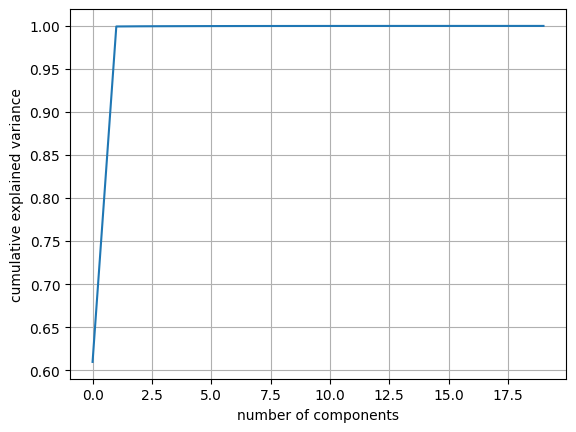

In [26]:
pca = PCA(random_state=RANDOM_STATE).fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_)[:20])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

In [27]:
np.cumsum(pca.explained_variance_ratio_)[0:3]

array([0.60962798, 0.99934076, 0.99954353])

Starts off at 1 component with 66% rate, 2 components at 99% rate. Chosen: 2 components

In [28]:
n_features = 2
X_projected = PCA(random_state=RANDOM_STATE, n_components=n_features).fit_transform(X)
X_projected.shape

(16714, 2)

<ipython-input-29-c17ed88f5509>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


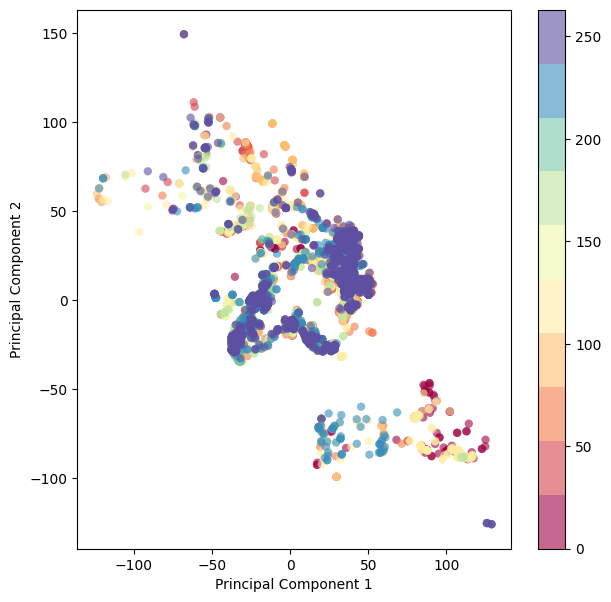

In [29]:
plt.figure(figsize=(7, 7))
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            c=y.values, edgecolor='none', alpha=0.6,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

# Machine Learning

## Imports

In [30]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold, ShuffleSplit

## Data Splitting

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_projected, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [32]:
def get_data_splits(n_splits):
  skf = StratifiedKFold(n_splits=n_splits, random_state=RANDOM_STATE, shuffle=True)
  splits = []
  for train_index, test_index in skf.split(x_train, y_train):
    x_val = X_projected
    y_val = y.values
    X_train, X_test = x_val[train_index], x_val[test_index]
    Y_train, Y_test = y_val[train_index], y_val[test_index]
    splits.append((X_train, X_test, Y_train, Y_test))
  return splits

## Decision Trees

In [33]:
def run_tree_on_data(X, y, x_test, y_test, clf=None, high_acc=0):
  criteria = ['gini', 'entropy', 'log_loss']
  max_depth = [None, 5, 10, 15, 20, 30, 50]

  for criterion in criteria:
    for depth in max_depth:
      tree = DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=RANDOM_STATE).fit(X, y)
      acc = tree.score(x_test, y_test)
      if acc > high_acc:
        clf = tree
        high_acc = acc
        print('best tree = criterion: {}, depth: {}, accuracy: {}'.format(criterion, depth, acc))
  return clf, high_acc

In [34]:
tree = None
accuracy = 0
n_splits = [5, 10, 15, 20, 25]

for n_split in n_splits:
  print(f'Split: {n_split}')
  data_splits = get_data_splits(n_split)
  for i, (X_train, X_test, Y_train, Y_test) in enumerate(data_splits):
    print(f'Fold: {i}')
    tree, accuracy = run_tree_on_data(X_train, Y_train, X_test, Y_test, tree, accuracy)
  
print(accuracy)
print(tree)

Split: 5
Fold: 0
best tree = criterion: gini, depth: None, accuracy: 0.32863247863247863


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best tree = criterion: gini, depth: 30, accuracy: 0.33076923076923076
best tree = criterion: entropy, depth: None, accuracy: 0.33376068376068374
best tree = criterion: entropy, depth: 20, accuracy: 0.33418803418803417
Fold: 1
best tree = criterion: gini, depth: None, accuracy: 0.3401709401709402
best tree = criterion: entropy, depth: None, accuracy: 0.34273504273504274
best tree = criterion: entropy, depth: 20, accuracy: 0.34316239316239316
Fold: 2
Fold: 3
best tree = criterion: gini, depth: None, accuracy: 0.3474358974358974
best tree = criterion: gini, depth: 30, accuracy: 0.34786324786324785
Fold: 4
Split: 10
Fold: 0


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fold: 1
best tree = criterion: gini, depth: None, accuracy: 0.3598290598290598
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Split: 15
Fold: 0


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(


Fold: 1
best tree = criterion: gini, depth: None, accuracy: 0.3730769230769231
best tree = criterion: gini, depth: 30, accuracy: 0.37564102564102564
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Fold: 10
best tree = criterion: gini, depth: None, accuracy: 0.3769230769230769
best tree = criterion: gini, depth: 30, accuracy: 0.37948717948717947
Fold: 11
Fold: 12
Fold: 13
Fold: 14
Split: 20
Fold: 0


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


Fold: 1
best tree = criterion: gini, depth: None, accuracy: 0.38290598290598293
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Fold: 10
Fold: 11
Fold: 12
Fold: 13
Fold: 14
Fold: 15
Fold: 16
Fold: 17
Fold: 18
Fold: 19
Split: 25
Fold: 0


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=25.
  warnings.warn(


Fold: 1
Fold: 2
best tree = criterion: gini, depth: None, accuracy: 0.38461538461538464
Fold: 3
best tree = criterion: gini, depth: None, accuracy: 0.39316239316239315
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Fold: 10
Fold: 11
Fold: 12
Fold: 13
Fold: 14
Fold: 15
Fold: 16
Fold: 17
Fold: 18
Fold: 19
Fold: 20
Fold: 21
Fold: 22
Fold: 23
Fold: 24
0.39316239316239315
DecisionTreeClassifier(random_state=42)


In [35]:
tree.score(x_test, y_test)

0.5509471585244268

## Random Forest

In [67]:
def run_forest_on_data(X, y, x_test, y_test, tree_kwargs, clf=None, high_acc=0):
  criteria = ['gini']
  max_depth = [None, 5, 10, 15, 20, 30, 50]
  min_samples = [1, 2, 3, 4, 5]
  n_estimators = [5, 10, 20, 25, 50, 80, 100, 120, 150, 200]

  for criterion in criteria:
    for depth in max_depth:
      for estimator in n_estimators:
        for min_sample in min_samples:
          forest = RandomForestClassifier(max_depth=depth, criterion=criterion, n_estimators=estimator, min_samples_leaf=min_sample, random_state=RANDOM_STATE).fit(X, y)
          acc = forest.score(x_test, y_test)
          if acc > high_acc:
            clf = forest
            high_acc = acc
            print('best forest = criterion: {}, depth: {}, min_samples: {}, n_estimators: {}, accuracy: {}'.format(criterion, depth, min_sample, estimator, acc))
  return clf, high_acc

In [68]:
forest = None
accuracy = 0
n_splits = [5, 10, 15, 20, 25]

for n_split in n_splits:
  print(f'Split: {n_split}')
  data_splits = get_data_splits(n_split)
  for i, (X_train, X_test, Y_train, Y_test) in enumerate(data_splits):
    print(f'Fold: {i}')
    forest, accuracy = run_forest_on_data(X_train, Y_train[:, 0], X_test, Y_test[:, 0], forest, accuracy)
  
print(accuracy)
print(forest)

Split: 5
Fold: 0
best forest = criterion: gini, depth: None, min_samples: 1, n_estimators: 5, accuracy: 0.4027777777777778


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best forest = criterion: gini, depth: None, min_samples: 1, n_estimators: 10, accuracy: 0.41154970760233917
best forest = criterion: gini, depth: None, min_samples: 1, n_estimators: 25, accuracy: 0.4144736842105263
best forest = criterion: gini, depth: None, min_samples: 1, n_estimators: 50, accuracy: 0.4159356725146199
best forest = criterion: gini, depth: None, min_samples: 1, n_estimators: 120, accuracy: 0.4195906432748538


KeyboardInterrupt: ignored

In [ ]:
  forest.score(x_test, y_test)

## Gradient Boosting

In [ ]:
def run_gd_on_data(X, y, x_test, y_test, clf=None, high_acc=0):
  loss_fns = ['log_loss', 'deviance', 'exponential']
  lr = [0.1, 0.05, 0.01, 0.005, 0.001]
  # n_estimators = []
  criteria = ['friedman_mse', 'squared_error']
  # min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  # min_samples_leafint = []

  for loss_fn in loss_fns:
    for rate in lr:
      for criterion in criteria:
        gb = GradientBoostingClassifier(loss=loss_fn, criterion=criterion, learning_rate=rate, random_state=RANDOM_STATE).fit(X, y)
        acc = gb.score(x_test, y_test)
        if acc > high_acc:
          clf = gb
          high_acc = acc
          print('best classifier = criterion: {}, loss: {}, lr: {}, accuracy: {}'.format(criterion, loss_fn, rate, acc))
  return clf, high_acc

In [ ]:
gbc = None
accuracy = 0
n_splits = [5, 10, 15, 20, 25]

for n_split in n_splits:
  print(f'Split: {n_split}')
  data_splits = get_data_splits(n_split)
  for i, (X_train, X_test, Y_train, Y_test) in enumerate(data_splits):
    print(f'Fold: {i}')
    gbc, accuracy = run_gd_on_data(X_train, Y_train, X_test, Y_test, gbc, accuracy)
  
print(accuracy)
print(gbc)

# Deep Learning

## Imports

In [21]:
from torch import nn
from torch import optim
import torch.nn.functional as F
import time
from torch.utils.data import DataLoader, TensorDataset
import random
from torchvision import transforms
from sklearn.model_selection import train_test_split

## Data Loading

In [24]:
g = torch.Generator()
g.manual_seed(RANDOM_STATE)

In [ ]:
def seed_worker(worker_id):
    np.random.seed(RANDOM_STATE)
    random.seed(RANDOM_STATE)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_projected, y.values, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [26]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [27]:
x_train_norm = F.normalize(torch.tensor(x_train, dtype=torch.float), p=2, dim=1)
x_valid_norm = F.normalize(torch.tensor(x_valid, dtype=torch.float), p=2, dim=1)

In [28]:
train_dataset = TensorDataset(x_train_norm, torch.tensor(y_train[:,0]))
valid_dataset = TensorDataset(x_valid_norm, torch.tensor(y_valid[:,0]))
test_dataset = TensorDataset(torch.tensor(x_test, dtype=torch.float), torch.tensor(y_test[:,0]))

In [29]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_threads, generator=g, worker_init_fn=seed_worker)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=False, num_workers=num_threads, generator=g, worker_init_fn=seed_worker)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_threads, generator=g, worker_init_fn=seed_worker)

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Model

In [46]:
class TemplateClassifier(nn.Module):
  def __init__(self, n_classes, n_features=2):
    super(TemplateClassifier, self).__init__()
    self.sequential = nn.Sequential(
        nn.Linear(n_features, 100),
        nn.ReLU(),
        nn.Linear(100, 250),
        nn.ReLU(),
        nn.Linear(250, 420),
        nn.ReLU(),
        nn.Linear(420, 250),
        nn.ReLU(),
        nn.Linear(250, 250),
        nn.ReLU(),
        nn.Linear(250, 50),
        nn.ReLU(),
        nn.Linear(50, n_classes)
    )

  def forward(self, X: torch.Tensor):
    logits = self.sequential(X)
    probas = torch.softmax(logits, dim=1)
    return logits, probas

In [34]:
model = TemplateClassifier(n_classes=y.shape[0], n_features=n_features).to(device)
model

TemplateClassifier(
  (sequential): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=250, bias=True)
    (3): ReLU()
    (4): Linear(in_features=250, out_features=420, bias=True)
    (5): ReLU()
    (6): Linear(in_features=420, out_features=250, bias=True)
    (7): ReLU()
    (8): Linear(in_features=250, out_features=250, bias=True)
    (9): ReLU()
    (10): Linear(in_features=250, out_features=50, bias=True)
    (11): ReLU()
    (12): Linear(in_features=50, out_features=9767, bias=True)
  )
)

In [56]:
class CNNTemplateClassifier(nn.Module):
  def __init__(self, n_classes):
    super(CNNTemplateClassifier, self).__init__()
    self.features = nn.Sequential(
        nn.Conv1d(in_channels=2, out_channels=64, kernel_size=11),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=3, stride=2),
        
        nn.Conv1d(in_channels=64, out_channels=192, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=3, stride=2),
        
        nn.Conv1d(in_channels=192, out_channels=384, kernel_size=3),
        nn.ReLU(),
        
        nn.Conv1d(in_channels=384, out_channels=256, kernel_size=3),
        nn.ReLU(),
        
        nn.Conv1d(in_channels=256, out_channels=256, kernel_size=3),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=3, stride=2),
    )
    
    self.classifier = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(256 * 6 * 6, 4096),
        nn.ReLU(True),
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(True),
        nn.Linear(4096, n_classes),
    )

  def forward(self, X: torch.Tensor):
    X = self.features(X)
    logits = self.classifier(X)
    probas = torch.softmax(logits, dim=1)
    return logits, probas

In [57]:
model2 = CNNTemplateClassifier(n_classes=y.shape[0]).to(device)
model2

CNNTemplateClassifier(
  (features): Sequential(
    (0): Conv1d(2, 64, kernel_size=(11,), stride=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(64, 192, kernel_size=(5,), stride=(1,))
    (4): ReLU()
    (5): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv1d(192, 384, kernel_size=(3,), stride=(1,))
    (7): ReLU()
    (8): Conv1d(384, 256, kernel_size=(3,), stride=(1,))
    (9): ReLU()
    (10): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
    (11): ReLU()
    (12): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=4096, out_fe

In [58]:
class TemplateClassifier2(nn.Module):
  def __init__(self, n_classes, n_features=2):
    super(TemplateClassifier2, self).__init__()
    self.sequential = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(n_features, 4096),
        nn.ReLU(True),
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(True),
        nn.Linear(4096, n_classes),
    )

  def forward(self, X: torch.Tensor):
    logits = self.sequential(X)
    probas = torch.softmax(logits, dim=1)
    return logits, probas

## Training

### Optimizer

In [39]:
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate
)

### Functions

In [40]:
def compute_accuracy_and_loss(model, data_loader, device):
    
    correct_pred, num_examples = 0, 0
    
    cross_entropy = 0.

    for ii, (features, targets) in enumerate(data_loader):
            
        features = features.to(device) # X
        targets = targets.to(device) # y

        logits, probas = model(features) # forward propagation z=logits, a=f(z)
        cross_entropy += F.cross_entropy(logits, targets).item()

        _, predicted_labels = torch.max(probas, 1)  # y_hat=predicted_labels
        num_examples += targets.size(0)

        correct_pred += (predicted_labels == targets).sum()

    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples

In [41]:
def train(model, num_epochs, train_loader, valid_loader):
  
  minibatch_cost = []
  train_acc_lst, valid_acc_lst = [], []
  train_loss_lst, valid_loss_lst = [], []

  best_acc = 0
  best_loss = np.inf

  start_time = time.time()
  for epoch in range(num_epochs):

      model.train()

      for batch_idx, (features, targets) in enumerate(train_loader):
          
          features = features.to(device) # X to device
          targets = targets.to(device) # Y to device
              
          # forward-propagation
          logits, probas = model.forward(features)

          # compute cost function
          cost = F.cross_entropy(logits, targets)

          # clean gradients
          optimizer.zero_grad()
          
          # compute derivatives (backward propagation)
          cost.backward()

          # append minibatch cost
          minibatch_cost.append(cost.item())
          
          # update model parameters
          optimizer.step() # w = w - learning_rate * partial_deriv_error
          
          # logging results
          if not batch_idx % 50:
              print ('Epoch: %05d/%05d | Batch %05d/%05d | Cost: %.4f' 
                    %(epoch+1, num_epochs, batch_idx, 
                      len(train_loader), cost))
              
      with torch.set_grad_enabled(False):
          train_acc, train_loss = compute_accuracy_and_loss(model, train_loader, device=device)
          valid_acc, valid_loss = compute_accuracy_and_loss(model, valid_loader, device=device)

          print('Epoch: %05d/%05d | Train cost: %.4f | Valid cost: %.4f | Train acc.: %.4f%% | Val.acc.: %.4f%%' % (
                epoch+1, num_epochs, 
                train_loss,
                valid_loss,
                train_acc,
                valid_acc))
          
          train_acc_lst.append(train_acc)
          valid_acc_lst.append(valid_acc)
          train_loss_lst.append(train_loss)
          valid_loss_lst.append(valid_loss)

          # if valid_acc > best_acc:
          #   best_acc = valid_acc
          #   print('Better model: saving to disk.')
          #   state = {
          #     'model': model.state_dict(),
          #     'best_acc': best_acc,
          #     'epoch': epoch,
          #     'optimizer': optimizer.state_dict(),
          #   }
          #   if not os.path.isdir('checkpoint'):
          #       os.mkdir('checkpoint')
          #   torch.save(state, './checkpoint/ckpt.pth')

          
      print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
      
  print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

  return minibatch_cost, train_loss_lst, valid_loss_lst, train_acc_lst, valid_acc_lst

### Actual Training

In [42]:
minibatch_cost, train_loss_lst, valid_loss_lst, train_acc_lst, valid_acc_lst = train(model, num_epochs, train_loader, valid_loader) # train model

Epoch: 00001/00010 | Batch 00000/00150 | Cost: 9.1758
Epoch: 00001/00010 | Batch 00050/00150 | Cost: 4.8992
Epoch: 00001/00010 | Batch 00100/00150 | Cost: 4.2246
Epoch: 00001/00010 | Train cost: 0.1211 | Valid cost: 0.1254 | Train acc.: 7.7534% | Val.acc.: 6.8259%
Time elapsed: 0.10 min
Epoch: 00002/00010 | Batch 00000/00150 | Cost: 3.7434
Epoch: 00002/00010 | Batch 00050/00150 | Cost: 3.6028
Epoch: 00002/00010 | Batch 00100/00150 | Cost: 3.3748
Epoch: 00002/00010 | Train cost: 0.1152 | Valid cost: 0.1189 | Train acc.: 8.2341% | Val.acc.: 8.5812%
Time elapsed: 0.18 min
Epoch: 00003/00010 | Batch 00000/00150 | Cost: 3.3432
Epoch: 00003/00010 | Batch 00050/00150 | Cost: 3.8259
Epoch: 00003/00010 | Batch 00100/00150 | Cost: 3.7974
Epoch: 00003/00010 | Train cost: 0.1136 | Valid cost: 0.1172 | Train acc.: 6.8757% | Val.acc.: 6.5334%
Time elapsed: 0.26 min
Epoch: 00004/00010 | Batch 00000/00150 | Cost: 3.8987
Epoch: 00004/00010 | Batch 00050/00150 | Cost: 3.8134
Epoch: 00004/00010 | Batch 0

In [60]:
minibatch_cost, train_loss_lst, valid_loss_lst, train_acc_lst, valid_acc_lst = train(model3, num_epochs, train_loader, valid_loader) # train model

Epoch: 00001/00010 | Batch 00000/00150 | Cost: 9.1732
Epoch: 00001/00010 | Batch 00050/00150 | Cost: 9.1936
Epoch: 00001/00010 | Batch 00100/00150 | Cost: 9.1807
Epoch: 00001/00010 | Train cost: 0.2881 | Valid cost: 0.2914 | Train acc.: 0.0209% | Val.acc.: 0.0000%
Time elapsed: 1.71 min
Epoch: 00002/00010 | Batch 00000/00150 | Cost: 9.2048
Epoch: 00002/00010 | Batch 00050/00150 | Cost: 9.1749
Epoch: 00002/00010 | Batch 00100/00150 | Cost: 9.1828
Epoch: 00002/00010 | Train cost: 0.2880 | Valid cost: 0.2913 | Train acc.: 0.0209% | Val.acc.: 0.0488%
Time elapsed: 3.42 min
Epoch: 00003/00010 | Batch 00000/00150 | Cost: 9.1833
Epoch: 00003/00010 | Batch 00050/00150 | Cost: 9.2146
Epoch: 00003/00010 | Batch 00100/00150 | Cost: 9.1851
Epoch: 00003/00010 | Train cost: 0.2881 | Valid cost: 0.2912 | Train acc.: 0.0000% | Val.acc.: 0.0000%
Time elapsed: 5.13 min
Epoch: 00004/00010 | Batch 00000/00150 | Cost: 9.1945


KeyboardInterrupt: ignored